System Specification 


Installing Library 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared

Data Collection and Processing 

In [3]:
# loading the csv data to a pandas dataframe 
gold_data = pd.read_csv('E:\Gold Price Predication\gld_price_data.csv')

In [4]:
#print the first 5 rows of dataframe 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows of dataframe 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#numbers of rows and colume 
gold_data.shape 

(2290, 6)

from google.colab import drive
drive.mount('/content/drive')

In [7]:
# getting some basic information about the data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getthing statical mesure of data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Relation 
2. Negative Relation 



In [10]:
correlation = gold_data.corr()

C:\Users\krips\AppData\Local\Temp\ipykernel_15388\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

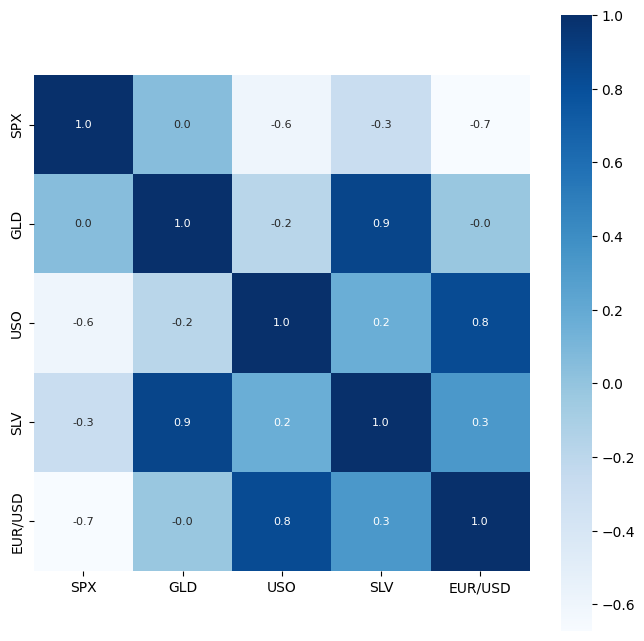

In [11]:
# construting the heapmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\krips\AppData\Local\Temp\ipykernel_15388\2653122876.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

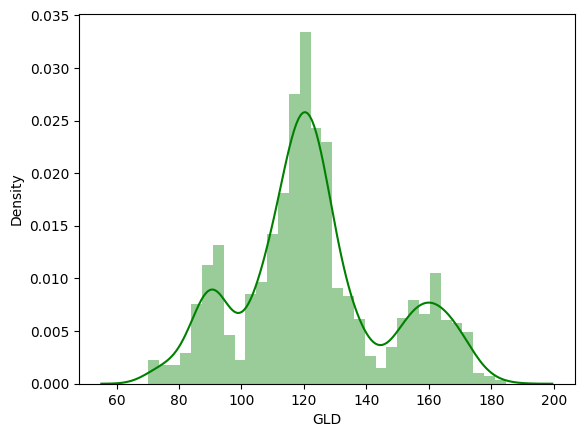

In [13]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Freatures and Target

In [14]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Tran data and Test data 

In [17]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

Model Training : Randome Forest Regression 

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
#training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution 


In [20]:
#Prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.34169927  81.96539986 115.91460046 127.76770046 120.97760114
 154.84689766 150.36839898 126.2065003  117.50119872 125.8202011
 116.79850095 171.98470121 142.2519985  167.8875991  115.18779976
 117.58940047 138.19500306 170.38570103 159.50290265 156.3014992
 155.09889989 125.10660046 176.51409964 156.99460285 125.15390039
  93.7532996   76.87910028 120.64219982 119.13559918 167.54959931
  88.20830047 125.05649965  91.22450056 117.69050009 121.03049885
 136.50760089 115.39480095 115.10610075 147.85729983 107.03770115
 104.10430222  87.09569782 126.55820052 117.98669984 152.42329913
 119.41830019 108.36330001 107.89039811  93.04610038 127.11499789
  74.48410045 113.73069923 121.15250052 111.18009911 118.79919893
 120.61249913 159.46180035 167.2248013  146.8689964   86.04349864
  94.39730036  86.67689887  90.43490046 118.89990074 126.45440034
 127.6933996  170.54600061 122.38879936 117.49339866  98.53170036
 167.41010148 143.08979878 131.8936031  121.11550249 120.87189924
 119.9834007

In [22]:
# R  squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9892403893060996


Comparing the Actual values vs Predicted values 

In [23]:
Y_test = list(Y_test)

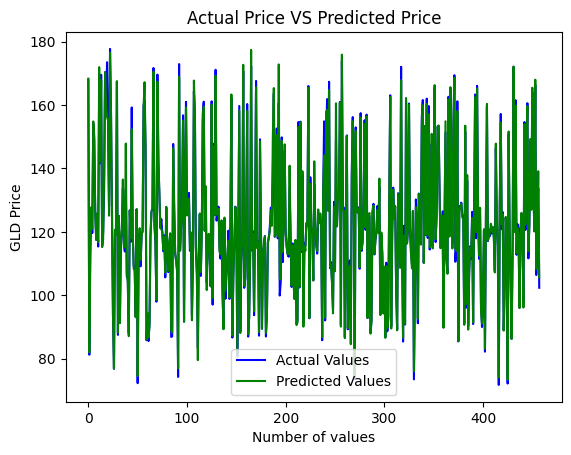

In [24]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
